In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense



In [2]:
# Load and preprocess the dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255



In [3]:
# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)



In [4]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])



C:\Users\Rahul Rajpurohit\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



In [6]:
# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))



Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 40s 40ms/step - accuracy: 0.7052 - loss: 0.8012 - val_accuracy: 0.8506 - val_loss: 0.4105
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 33s 35ms/step - accuracy: 0.8659 - loss: 0.3743 - val_accuracy: 0.8717 - val_loss: 0.3617
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 38s 41ms/step - accuracy: 0.8866 - loss: 0.3137 - val_accuracy: 0.8864 - val_loss: 0.3203
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 32s 34ms/step - accuracy: 0.8980 - loss: 0.2831 - val_accuracy: 0.8921 - val_loss: 0.3043
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 40s 32ms/step - accuracy: 0.9054 - loss: 0.2610 - val_accuracy: 0.8962 - val_loss: 0.2806
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 40s 31ms/step - accuracy: 0.9145 - loss: 0.2304 - val_accuracy: 0.9052 - val_loss: 0.2668
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 51s 42ms/step - accuracy: 0.9184 - loss: 0.2170 - val_accuracy: 0.9069 - val_loss: 0.2673
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 24s 25ms/step - accuracy: 0.9281 - loss: 0.1932 - 

In [7]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9034 - loss: 0.2774
Test accuracy: 0.9057000279426575


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted Label: Ankle boot


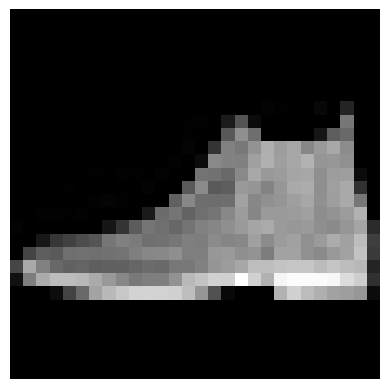

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Define the class labels
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Get the predictions for the first image in the test set
predictions = model.predict(x_test[:1])

# Get the predicted label index
predicted_label_index = np.argmax(predictions)

# Get the predicted label
predicted_label = labels[predicted_label_index]

# Display the predicted label
print("Predicted Label:", predicted_label)

# Display the image
plt.imshow(x_test[:1][0], cmap='gray')
plt.axis('off')  # Turn off axis
plt.show()
